<a href="https://colab.research.google.com/github/Markholtje/JupyterNotebook-Labs/blob/master/SUE_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install geopandas

In [0]:
import geopandas as gpd

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#MARC's PATH:
#path = "/content/drive/My Drive/Second Year (NYU)/Spring 2020 (2nd Year)/Computing for SUE/Final Project/Datasets/MapPLUTO - Optimized.csv"
#Alex's PATH:
#path = "/content/drive/My Drive/Final Project/Datasets/MapPLUTO - Optimized.csv"
#ALAN's PATH:
#path = "drive/My Drive/sue/MapPLUTO - Optimized.csv"
housing = pd.read_csv(path)


FileNotFoundError: ignored

In [0]:
housing.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ResArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotType,AssessLand,AssessTot,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,TaxMap,Latitude,Longitude,Shape_Leng,Shape_Area,Land$/sqft,Bldg$/sqft
0,BK,5527,50,311,246.00,2000.0,20.0,47,11204,1965 62 STREET,A5,1.0,NaN,"XIE, JOSEPH JIANDONG",1800,1440,1440,1,2.0,1,1,5,17880.0,57960.0,0.0,1925,1999,0,0.80,1.25,3,3.055270e+09,0,246.0,988564,164706,22d,NaN,31703.0,40.618755,-73.984461,240.542515,1886.597524,9.93,40.25
1,SI,5094,26,503,132.03,1013.0,31.0,51,10306,289 DURANT AVENUE,B2,1.0,NaN,MARC BOSHNACK,6000,2232,2232,1,2.0,2,2,5,14460.0,45600.0,0.0,1975,0,0,0.37,0.50,5,5.050940e+09,0,13203.0,946374,140904,33c,NaN,52201.0,40.553344,-74.136298,326.646564,6214.094994,2.41,20.43
2,BX,4649,74,212,392.00,1001.0,11.0,12,10467,3719 OLINVILLE AVENUE,A1,1.0,NaN,"DARAKJIAN, NINA",4750,1968,1968,3,2.5,1,1,5,11520.0,39060.0,3210.0,1925,0,0,0.41,1.10,2,2.046490e+09,0,392.0,1021247,260865,2b,NaN,21607.0,40.882611,-73.866206,281.671351,4404.130503,2.43,19.85
3,QN,1597,27,404,465.00,1005.0,24.0,21,11373,95-17 42 AVENUE,B1,1.0,NaN,"MIZHQUIRI, DANIEL S",2340,2240,2240,2,2.0,2,2,5,21660.0,72540.0,1400.0,1920,0,0,0.96,1.25,4,4.015970e+09,0,465.0,1020479,211179,9d,NaN,40906.0,40.746240,-73.869251,233.061166,2238.448921,9.26,32.38
4,MN,116,46,103,27.00,1009.0,2.0,1,10038,35 MADISON STREET,C7,4.0,NaN,METRO CITY ACQUISITION LLC,2000,6924,3924,1,4.0,10,12,5,247500.0,614700.0,0.0,1910,0,0,3.46,3.44,1,1.001160e+09,0,27.0,984543,198701,12d,NaN,10104.0,40.712065,-73.998943,213.144889,2015.118381,123.75,88.78


In [0]:
#Land Value by Borough/Coordinates/etc.
housing.tail(20)
housing1=housing[["Borough","Land$/sqft", "Bldg$/sqft"]]
housing1.head()

,Borough,Land$/sqft,Bldg$/sqft
0,BK,9.93,40.25
1,SI,2.41,20.43
2,BX,2.43,19.85
3,QN,9.26,32.38
4,MN,123.75,88.78


In [0]:
house=housing1.groupby(['Borough']).mean()

In [0]:
house.head(30)

,Land$/sqft,Bldg$/sqft
Borough,,
BK,12.342613,46.334639
BX,5.870699,23.135439
MN,127.704254,154.876239
QN,6.519360,32.411309
SI,3.213997,23.932953


In [0]:
sortedhouse=house.sort_values(['Land$/sqft'])
sortedhouse.head()

,Land$/sqft,Bldg$/sqft
Borough,,
SI,3.213997,23.932953
BX,5.870699,23.135439
QN,6.519360,32.411309
BK,12.342613,46.334639
MN,127.704254,154.876239


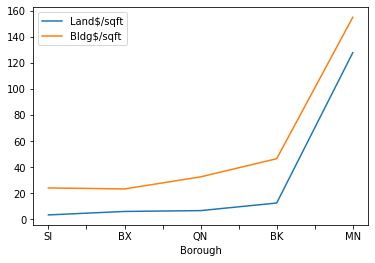

In [0]:
sortedhouse.plot()

In [0]:
#education
boro_edu = pd.read_csv('drive/My Drive/sue/County Education Levels.csv')

In [0]:
#NOTE:
#Kings County == Brooklyn
#New York County == Manhattan
#Richmond County == Staten Island
boro_edu.head(6)


,GEO_ID,NAME,DP02_0058E,DP02_0059E,DP02_0059PE,DP02_0060E,DP02_0060PE,DP02_0061E,DP02_0061PE,DP02_0062E,DP02_0062PE,DP02_0063E,DP02_0063PE,DP02_0064E,DP02_0064PE,DP02_0065E,DP02_0065PE,DP02_0066E,DP02_0066PE,DP02_0067E,DP02_0067PE
0,id,Geographic Area Name,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...,Estimate!!EDUCATIONAL ATTAINMENT!!Population 2...,Percent Estimate!!EDUCATIONAL ATTAINMENT!!Popu...
1,0500000US36005,"Bronx County, New York",924137,131141,14.2,127815,13.8,255427,27.6,159430,17.3,67190,7.3,118587,12.8,64547,7,665181,72,183134,19.8
2,0500000US36047,"Kings County, New York",1777281,163082,9.2,163387,9.2,455299,25.6,238066,13.4,108986,6.1,390322,22,258139,14.5,1450812,81.6,648461,36.5
3,0500000US36061,"New York County, New York",1247071,87317,7,74920,6,155048,12.4,121886,9.8,49575,4,391234,31.4,367091,29.4,1084834,87,758325,60.8
4,0500000US36081,"Queens County, New York",1646256,167643,10.2,136238,8.3,454105,27.6,240393,14.6,128878,7.8,327893,19.9,191106,11.6,1342375,81.5,518999,31.5
5,0500000US36085,"Richmond County, New York",328753,16162,4.9,21513,6.5,101738,30.9,56186,17.1,24828,7.6,64778,19.7,43548,13.2,291078,88.5,108326,33


In [0]:
boro_edu['NAME']["Kings County, New York"]="BK"
boro_edu['NAME']["Bronx County, New York"]="BX"
boro_edu['NAME']["New York County, New York"]="MN"
boro_edu['NAME']["New York County, New York"]="MN"
boro_edu['NAME']["New York County, New York"]="MN"

In [0]:
#education
edu = pd.read_csv('drive/My Drive/sue/USedu.csv')


In [0]:
edu.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730","11,717,266",47.7,31.1,10.6,10.7,"44,535,197","45,947,035","20,794,975","21,558,480",33.5,34.6,15.7,16.2,"39,343,718","47,642,763","39,571,702","32,310,253",24.8,30.0,24.9,20.3,"35,715,625","52,168,981","49,864,428","44,462,605",19.6,28.6,27.4,24.4,"26,948,057","59,265,308","63,365,655","68,867,051",12.3,27.1,29.0,31.5
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287","141,936",58.7,25.9,7.5,7.8,"964,840","704,207","278,205","270,063",43.5,31.8,12.5,12.2,"843,638","749,591","553,512","399,228",33.1,29.4,21.7,15.7,"714,081","877,216","746,495","549,608",24.7,30.4,25.9,19.0,"470,043","1,020,172","987,148","822,595",14.2,30.9,29.9,24.9
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,767,54.8,31.1,7.7,6.4,"7,074","6,145","2,104","2,117",40.6,35.2,12.1,12.1,"6,252","6,671","4,912","3,026",30.0,32.0,23.5,14.5,"5,872","9,332","7,413","4,972",21.3,33.8,26.9,18.0,"4,204","12,119","10,552","10,291",11.3,32.6,28.4,27.7
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,6.5,"18,125","15,380","6,602","5,498",39.7,33.7,14.5,12.1,"17,309","20,544","15,900","10,870",26.8,31.8,24.6,16.8,"17,258","28,428","28,178","22,146",18.0,29.6,29.3,23.1,"14,310","40,579","46,025","46,075",9.7,27.6,31.3,31.3
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,861,68.8,19.0,4.9,7.3,"7,759","3,671","1,362","1,300",55.1,26.1,9.7,9.2,"6,965","4,258","2,622","1,857",44.4,27.1,16.7,11.8,"6,679","6,124","4,025","2,068",35.3,32.4,21.3,10.9,"4,901","6,486","4,566","2,220",27.0,35.7,25.1,12.2


In [0]:
edu=edu[["State","Percent of adults with a bachelor's degree or higher, 2014-18"]]
edu.head()

,State,"Percent of adults with a bachelor's degree or higher, 2014-18"
0,US,31.5
1,AL,24.9
2,AL,27.7
3,AL,31.3
4,AL,12.2


In [0]:
edu1=edu.groupby(['State']).mean()


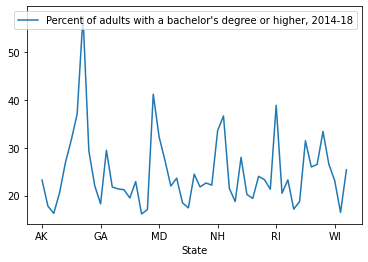

In [0]:
edu1.head(10)
edu1.plot()

In [0]:
sortededu=edu1.sort_values(["Percent of adults with a bachelor's degree or higher, 2014-18"])


In [0]:
sortededu.head()

,"Percent of adults with a bachelor's degree or higher, 2014-18"
State,
KY,16.162810
AR,16.269737
WV,16.460714
LA,17.049231
TN,17.170833


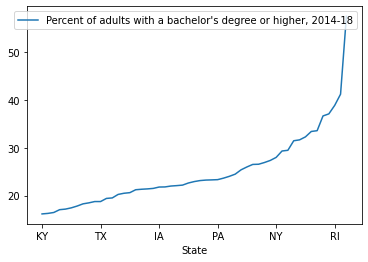

In [0]:
sortededu.plot()

In [0]:
gini = pd.read_csv('drive/My Drive/sue/gini.csv')


In [0]:
gini.sort_values(["gini index"])
gini.head()

,num,fullname,gini index,State
0,1,Utah,0.4063,UT
1,2,Alaska,0.4081,AK
2,3,New Hampshire,0.4304,NH
3,4,Wyoming,0.4360,WY
4,5,Hawaii,0.4420,HI


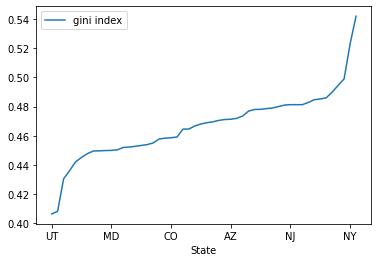

In [0]:
gini=gini[["State","gini index"]]
gini.plot(x="State")


In [0]:
merged=edu.merge(gini,on='State')


In [0]:
merged=pd.merge(gini,sortededu[["Percent of adults with a bachelor's degree or higher, 2014-18"]],on="State")

In [0]:
merged.shape


(51, 3)

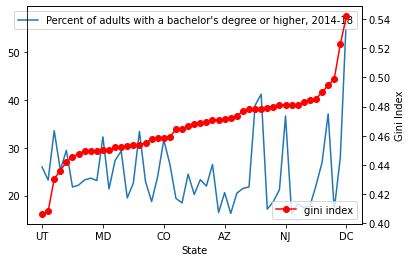

In [0]:
 import matplotlib.pyplot as plt 

 merged.plot(x="State", y=["Percent of adults with a bachelor's degree or higher, 2014-18"])
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.legend(['gini index'],loc=4)
 ax.set_ylabel('Gini Index')
 plt.show()

In [0]:
crime = pd.read_csv('drive/My Drive/sue/CleanCrime1.csv')

In [0]:
crime.head()

,State,States,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,AL,Alabama,4849377,20727,276,1436,2005,4701,13745,154094,39715,104238,10141,427.4,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1
1,AK,Alaska,736732,4684,41,555,771,629,3243,20334,3150,15445,1739,635.8,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0
2,AZ,Arizona,6731484,26916,319,2464,3378,6249,16970,215240,43562,154091,17587,399.9,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3
3,AR,Arkansas,2966369,14243,165,1182,1763,2050,10265,99018,24790,68627,5601,480.1,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8
4,CA,California,38802500,153709,1699,8398,11527,48680,91803,947192,202670,592670,151852,396.1,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3


In [0]:
violent=crime[["State","Violent Crime rate"]]
violent.columns = violent.columns.str.strip() 
gini.columns = gini.columns.str.strip()
violent.shape 


(52, 2)

In [0]:
#violent.head()
#print(gini["State"])
print(violent["State"])

0      AL
1      AK
2      AZ
3      AR
4      CA
5      CO
6      CT
7      DE
8      DC
9      FL
10     GA
11     HI
12     ID
13     IL
14     IN
15     IA
16     KS
17     KY
18     LA
19     ME
20     MD
21     MA
22     MI
23     MN
24     MS
25     MO
26     MT
27     NE
28     NV
29     NH
30     NJ
31     NM
32     NY
33     NC
34     ND
35     OH
36     OK
37     OR
38     PA
39     RI
40     SC
41     SD
42     TN
43     TX
44     UT
45     VT
46     VA
47     WA
48     WV
49     WI
50     WY
51    USA
Name: State, dtype: object


In [0]:
gini=gini.sort_values(["gini index"])

print(gini)


   State  gini index
0     UT      0.4063
1     AK      0.4081
2     NH      0.4304
3     WY      0.4360
4     HI      0.4420
5     IA      0.4451
6     NE      0.4477
7     SD      0.4495
8     MN      0.4496
9     WI      0.4498
10    MD      0.4499
11    ID      0.4503
12    ME      0.4519
13    DE      0.4522
14    IN      0.4527
15    ND      0.4533
16    VT      0.4539
17    KS      0.4550
18    NV      0.4577
19    OR      0.4583
20    CO      0.4586
21    WA      0.4591
22    OK      0.4645
23    MO      0.4646
24    MT      0.4667
25    OH      0.4680
26    PA      0.4689
27    MI      0.4695
28    VA      0.4705
29    WV      0.4711
30    AZ      0.4713
31    AR      0.4719
32    SC      0.4735
33    NM      0.4769
34    NC      0.4780
35    RI      0.4781
36    MA      0.4786
37    TN      0.4790
38    TX      0.4800
39    IL      0.4810
40    NJ      0.4813
41    KY      0.4813
42    GA      0.4813
43    MS      0.4828
44    AL      0.4847
45    FL      0.4852
46   USA     

In [0]:
# merged=violent.merge(gini,on='State')
violentmerged=gini.merge(violent,on='State')


In [0]:
violentmerged.head()

,State,gini index,Violent Crime rate
0,UT,0.4063,215.6
1,AK,0.4081,635.8
2,NH,0.4304,196.1
3,WY,0.4360,195.5
4,HI,0.4420,259.2


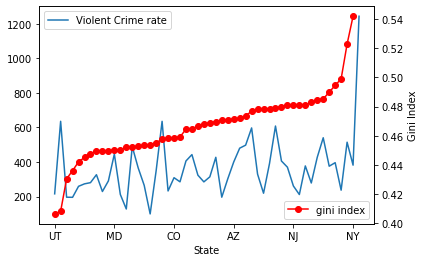

In [0]:
 violentmerged.plot(x="State", y=["Violent Crime rate"])
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index')
 ax.legend(['gini index','Violent Crime rate'],loc=4)
 plt.show()

In [0]:
burgle=crime[["State","Burglary rate"]]
burglemerged=gini.merge(burgle,on='State')


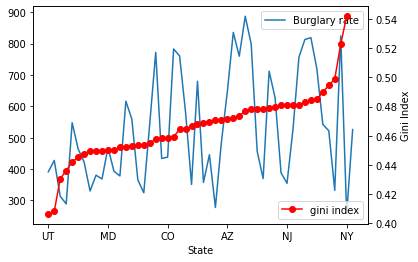

In [0]:
 burglemerged.plot(x="State", y=["Burglary rate"]).legend(bbox_to_anchor=(20, 20))
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index') 
 plt.legend(loc='lower right')
 plt.show()

In [0]:
larceny=crime[["State","Larceny-theft rate"]]
larcenymerged=gini.merge(larceny,on='State')

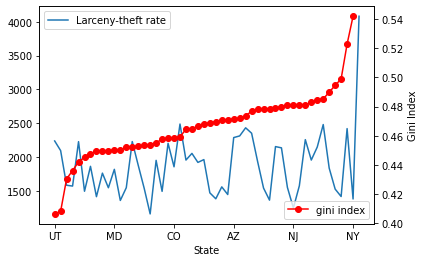

In [0]:
 larcenymerged.plot(x="State", y=["Larceny-theft rate"]).legend(bbox_to_anchor=(20, 20))
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index') 
 plt.legend(loc='lower right')
 plt.show()

In [0]:
rape=crime[["State","Legacy rape rate /1"]]
rapemerged=gini.merge(rape,on='State')

In [0]:
rapemerged.head()

,State,gini index,Legacy rape rate /1
0,UT,0.4063,32.1
1,AK,0.4081,75.3
2,NH,0.4304,34.5
3,WY,0.4360,21.6
4,HI,0.4420,22.1


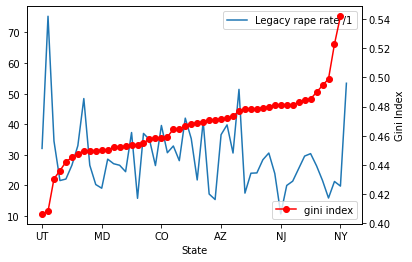

In [0]:
 rapemerged.plot(x="State", y=["Legacy rape rate /1"]).legend(bbox_to_anchor=(20, 20))
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index') 
 plt.legend(loc='lower right')
 plt.show()

In [0]:
poverty = pd.read_csv('drive/My Drive/sue/data.csv')
poverty.head()

,rank,State,Population,Poverty,PovertyRate
0,NaN,Mississippi,2988762,599795,0.2007
1,NaN,New Mexico,2092434,410389,0.1961
2,NaN,Louisiana,4663616,878394,0.1884
3,NaN,Kentucky,4440204,772080,0.1739
4,NaN,West Virginia,1829054,315464,0.1725


In [0]:
crime.head()

,State,States,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,AL,Alabama,4849377,20727,276,1436,2005,4701,13745,154094,39715,104238,10141,427.4,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1
1,AK,Alaska,736732,4684,41,555,771,629,3243,20334,3150,15445,1739,635.8,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0
2,AZ,Arizona,6731484,26916,319,2464,3378,6249,16970,215240,43562,154091,17587,399.9,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3
3,AR,Arkansas,2966369,14243,165,1182,1763,2050,10265,99018,24790,68627,5601,480.1,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8
4,CA,California,38802500,153709,1699,8398,11527,48680,91803,947192,202670,592670,151852,396.1,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3


In [0]:
trans=crime[["State","States"]]

In [0]:
poverty = poverty.rename(columns={'State': 'States'})
poverty.head()

,rank,States,Population,Poverty,PovertyRate
0,NaN,Mississippi,2988762,599795,0.2007
1,NaN,New Mexico,2092434,410389,0.1961
2,NaN,Louisiana,4663616,878394,0.1884
3,NaN,Kentucky,4440204,772080,0.1739
4,NaN,West Virginia,1829054,315464,0.1725


In [0]:
poverty=trans.merge(poverty,on='States')

In [0]:
poverty.head()

,State,States,rank,Population,Poverty,PovertyRate
0,AL,Alabama,NaN,4864680,829400,0.1705
1,AK,Alaska,NaN,738516,77865,0.1054
2,AZ,Arizona,NaN,6946685,1092192,0.1572
3,AR,Arkansas,NaN,2990671,510337,0.1706
4,CA,California,NaN,39148760,5487141,0.1402


In [0]:
povmerged=gini.merge(poverty,on='State')

In [0]:
povmerged.head()

,State,gini index,States,rank,Population,Poverty,PovertyRate
0,UT,0.4063,Utah,NaN,3045350,309904,0.1018
1,AK,0.4081,Alaska,NaN,738516,77865,0.1054
2,NH,0.4304,New Hampshire,NaN,1343622,102352,0.0762
3,WY,0.4360,Wyoming,NaN,581836,63311,0.1088
4,HI,0.4420,Hawaii,NaN,1422029,137516,0.0967


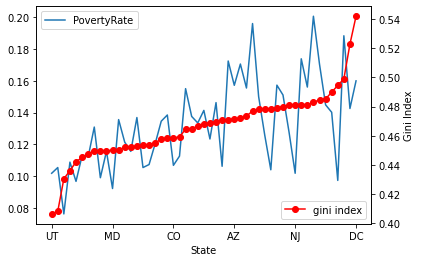

In [0]:
 povmerged.plot(x="State", y=["PovertyRate"]).legend(bbox_to_anchor=(20, 20))
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index') 
 plt.legend(loc='lower right')
 plt.show()

**For Poverty rate its homelessness/population**

In [0]:
home = pd.read_csv('drive/My Drive/sue/Home.csv')
home.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Average Value March 2019-2020,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,640573.4615,631517,630167,630698,632055,632683,634150,636295,639331,641908,646084,650608,657464,664495
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,247247.8462,246887,247265,247481,247549,247860,247905,247709,247416,247110,246836,246704,246694,246806
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,198844.0000,196909,196658,196648,197084,197701,198241,198605,199206,199748,200350,200569,201110,202143
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,289799.0769,280906,281591,282451,283650,285115,286994,288669,290583,292654,295076,297501,299765,302433
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,608644.1538,595100,597765,599583,601312,603078,604617,606428,607862,610758,614348,619380,623624,628519


In [0]:
home=home[["State","3/31/2020"]]
home.head()

,State,3/31/2020
0,CA,664495
1,IL,246806
2,TX,202143
3,AZ,302433
4,CA,628519


In [0]:
home=home.groupby(['State']).mean()

In [0]:
home.head(10)



,3/31/2020
State,
AK,299329.923077
AL,113157.769231
AR,93762.270270
AZ,221164.466667
CA,474212.137931
CO,310767.812500
CT,262869.875000
DC,640834.000000
DE,263119.333333


In [0]:
homemerged=gini.merge(home,on='State')

In [0]:
 homemerged.plot(x="State", y=["3/31/2020"]).legend(bbox_to_anchor=(20, 20))
 ax = merged['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index') 
 plt.legend(loc='lower right')
 plt.show()

NameError: ignored

In [0]:
union = pd.read_csv('drive/My Drive/sue/Union.csv')


In [0]:
union.head()


,state,State,Total Employed 2018,Total members 2018,Percent of employed 2018,total represented by unions 2018,Percent of employed represented by unions 2018,Total employed 2019,Total members 2018.1,Percent of employed 2019,total represented by unions 2019,Percent of employed represented by unions 2019
0,AL,Alabama,"1,950",180,9.2,196,10.1,"2,041",173,8.5,199,9.8
1,AK,Alaska,299,55,18.5,60,20.0,282,48,17.1,53,18.7
2,AZ,Arizona,"2,943",156,5.3,191,6.5,"3,028",174,5.7,214,7.1
3,AR,Arkansas,"1,176",56,4.8,62,5.3,"1,200",62,5.2,71,5.9
4,CA,California,"16,399","2,405",14.7,"2,587",15.8,"16,485","2,504",15.2,"2,726",16.5


In [0]:
gini.head()

,num,fullname,gini index,State
0,1,Utah,0.4063,UT
1,2,Alaska,0.4081,AK
2,3,New Hampshire,0.4304,NH
3,4,Wyoming,0.4360,WY
4,5,Hawaii,0.4420,HI


In [0]:
unionmerged=gini.merge(union,on='state')


In [0]:
unionmerged.head()

,num,fullname,gini index,state,State,Total Employed 2018,Total members 2018,Percent of employed 2018,total represented by unions 2018,Percent of employed represented by unions 2018,Total employed 2019,Total members 2018.1,Percent of employed 2019,total represented by unions 2019,Percent of employed represented by unions 2019
0,1,Utah,0.4063,UT,Utah,"1,343",56,4.1,76,5.7,"1,409",62,4.4,83,5.9
1,2,Alaska,0.4081,AK,Alaska,299,55,18.5,60,20.0,282,48,17.1,53,18.7
2,3,New Hampshire,0.4304,NH,New Hampshire,664,68,10.2,77,11.6,677,69,10.3,79,11.6
3,4,Wyoming,0.4360,WY,Wyoming,235,15,6.5,18,7.7,243,18,7.3,21,8.7
4,5,Hawaii,0.4420,HI,Hawaii,601,139,23.1,146,24.3,574,135,23.5,147,25.5


NameError: ignored

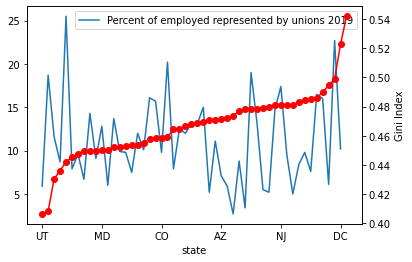

In [0]:
 unionmerged.plot(x="state", y=["Percent of employed represented by unions 2019"]).legend(bbox_to_anchor=(20, 20))
 ax = gini['gini index'].plot(secondary_y=True, color='r', marker='o')
 ax.set_ylabel('Gini Index') 
 plt.legend(loc='lower right')
 plt.show()